## Step 1 - Data Preprocessing

In [133]:
import numpy as np
import pandas as pd
import glob
import xml.etree.ElementTree as ET
import seaborn as sns

In [134]:
class RNASequences:
    def __init__(self, data_dir="Data/"):
        filenames = glob.glob("*.txt", root_dir=data_dir)
        dfs = []

        for filename in filenames:
            df = pd.read_csv(data_dir + filename, sep="\t", names=[filename[:10]], skiprows=1).T
            dfs.append(df)
        
        self.__rna_counts = pd.concat(dfs)

        self.__annotations = pd.DataFrame(columns=("Subject ID", "Sample Group", "CNS Subregion"))
        tree = ET.parse(open("Data/GSE124439_family.xml"))
        root = tree.getroot()
        namespace = {"ns": "http://www.ncbi.nlm.nih.gov/geo/info/MINiML"}

        for sample in root.findall("ns:Sample", namespace):
            sample_id = sample.attrib["iid"]
            for channel in sample.iterfind(".//ns:Channel", namespace):
                self.__annotations.loc[sample_id] = [
                    channel[4].text.strip(),
                    channel[5].text.strip(),
                    channel[3].text.strip(),
                ]
        
        self.__annotations = self.__annotations
        self.__check_annotations()
    

    def __check_annotations(self):
        assert self.__rna_counts.index.difference(self.__annotations.index).empty


    def _ipython_display_(self):
        display(self.__rna_counts)
        display(self.__annotations)


    def get_counts(self):
        return self.__rna_counts
    

    def get_annotations(self):
        return self.__annotations


    def get_count(self, item):
        if isinstance(item, str):
            return self.__rna_counts[item]
        else:
            return self.__rna_counts.at[item[0], item[1]]
    

    def get_annotation(self, item):
        if isinstance(item, str):
            return self.__annotations[item]
        else:
            return self.__annotations.at[item[0], item[1]]
        

    def get_sample(self, sample=None):
        match sample:
            case "ALS":
                return self.__annotations.loc[self.__annotations["Sample Group"] == "ALS Spectrum MND"]
            case "Control":
                return self.__annotations.loc[self.__annotations["Sample Group"] == "Non-Neurological Control"]
            case "Other":
                return self.__annotations.loc[self.__annotations["Sample Group"] == "Other Neurological Disorders"]
            case _:
                return self.__annotations
            
    
    def get_sample_count(self, sample=None):
        return self.__rna_counts.loc[self.get_sample(sample).index]


    def mean(self, sample=None):
        return self.get_sample_count(sample).mean().to_frame().rename(columns={0: "Means"})
    

    def median(self, sample=None):
        return self.get_sample_count(sample).median().to_frame().rename(columns={0: "Medians"})
    

    def std(self, sample=None):
        return self.get_sample_count(sample).std().to_frame().rename(columns={0: "Standard Deviations"})
    

rna_sequences = RNASequences()
rna_sequences

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533247,23,100,0,1641,75,128,2,1,21,0,...,855,2046,1843,1161,84,492,142,454,1602,1665
GSM3533313,27,108,0,1609,89,110,5,1,12,0,...,755,1562,1570,782,95,459,123,360,1273,1560
GSM3533338,28,100,1,1025,78,105,2,1,26,0,...,580,1216,1192,688,65,299,108,274,1081,1143
GSM3533281,16,65,0,2425,51,123,2,0,113,0,...,570,1389,1210,689,71,364,81,296,1201,1422
GSM3533358,55,164,1,1620,138,85,4,8,42,0,...,666,1590,1465,823,79,380,85,325,1262,1465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533300,24,97,0,3752,141,365,2,5,97,0,...,866,1995,1791,1053,85,501,108,427,1732,1730
GSM3533233,22,101,0,2131,142,143,5,1,36,0,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533359,29,145,0,1424,119,111,1,4,52,0,...,751,1853,1655,922,89,503,131,463,1624,1742
GSM3533310,29,88,0,1171,86,105,3,2,37,1,...,809,1790,1590,764,93,435,125,350,1579,1871


,Subject ID,Sample Group,CNS Subregion
GSM3533230,NEUEL133AK6,ALS Spectrum MND,Frontal Cortex
GSM3533231,NEUYV496XLP,ALS Spectrum MND,Frontal Cortex
GSM3533232,NEUZU200WEQ,ALS Spectrum MND,Frontal Cortex
GSM3533233,NEUME287RK2,ALS Spectrum MND,Frontal Cortex
GSM3533234,NEUEC006FND,ALS Spectrum MND,Frontal Cortex
...,...,...,...
GSM3533401,NEUMY028JH4,ALS Spectrum MND,Frontal Cortex
GSM3533402,NEUXR145UBL,ALS Spectrum MND,Frontal Cortex
GSM3533403,NEUKN209FNW,ALS Spectrum MND,Frontal Cortex
GSM3533404,NEUUF289NRL,ALS Spectrum MND,Frontal Cortex


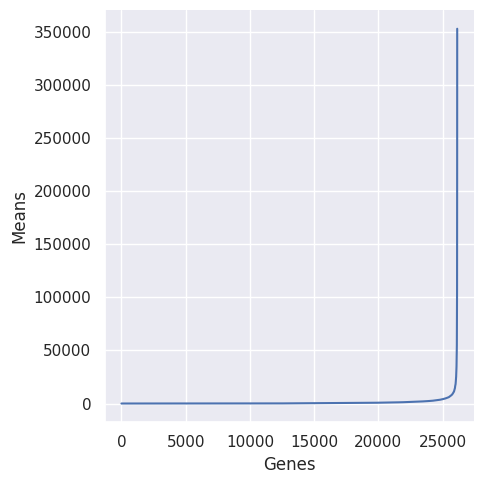

In [135]:
sns.set_theme()

means = rna_sequences.mean(sample="Other")
means = means[means["Means"] != 0.0].sort_values(by="Means")
genes_count = np.arange(len(means.index))
means["Genes"] = genes_count

sns.relplot(data=means, x="Genes", y="Means", kind="line")